In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
from sklearn.model_selection import train_test_split

## Dataset

every kid in town gets 20 to 30 PKR pocket money

predict amount of daily pocket money based on kids

In [21]:
N = 100 # samples
kids = np.random.randint(1, 5, N)
pocket_money = kids * np.random.randint(20, 30, N)

In [22]:
dataset = pd.DataFrame({'kids':kids, 'pocket_money':pocket_money})
dataset

,kids,pocket_money
0,4,80
1,3,66
2,3,63
3,3,75
4,1,21
...,...,...
95,1,24
96,4,80
97,4,100
98,3,84


In [23]:
XTrain, XTest, YTrain, YTest = train_test_split(dataset[['kids']], dataset['pocket_money'], test_size=0.2)

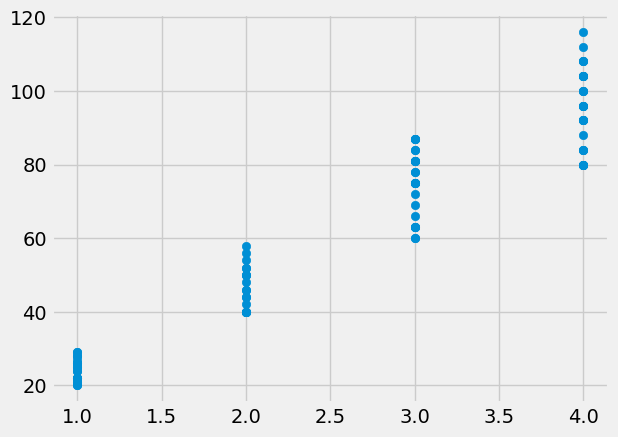

In [24]:
plt.style.use('fivethirtyeight')
plt.scatter(dataset['kids'], dataset['pocket_money'])

## Model

In [25]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(XTrain, YTrain)

LinearRegression()

/home/anderson/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


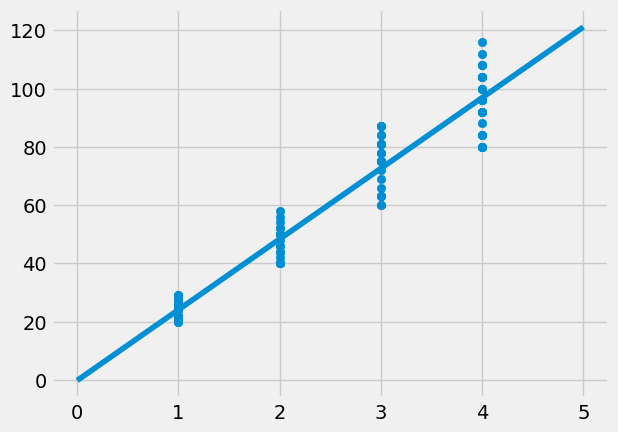

In [26]:
line = np.linspace(0, 5, 1000)

plt.scatter(dataset['kids'], dataset['pocket_money'])
plt.plot(line, model.predict(line[:, None]))

In [34]:
# w and b
print(model.coef_[0], model.intercept_)

24.270794824399267 -0.24260628465805212


## Scratch

In [27]:
import numpy as np

class MyLR:
  def __init__(self, lr=0.01, iter=1000):
    self.lr = lr
    self.iter = iter

  def fit(self, X, y):
    n_samples, n_features = X.shape
    
    # Initialize weights and bias
    self.weights = np.random.rand(n_features)
    self.bias = 0
    
    # Gradient descent
    for _ in range(self.iter):
      y_predicted = np.dot(X, self.weights) + self.bias
      
      # Compute gradients
      dw = np.dot(X.T, (y_predicted - y)) / n_samples
      db = np.sum(y_predicted - y) / n_samples
      
      # Update weights and bias
      self.weights -= self.lr * dw
      self.bias -= self.lr * db

  def predict(self, X):
    return np.dot(X, self.weights) + self.bias


In [28]:
mlr = MyLR()
mlr.fit(XTrain, YTrain)

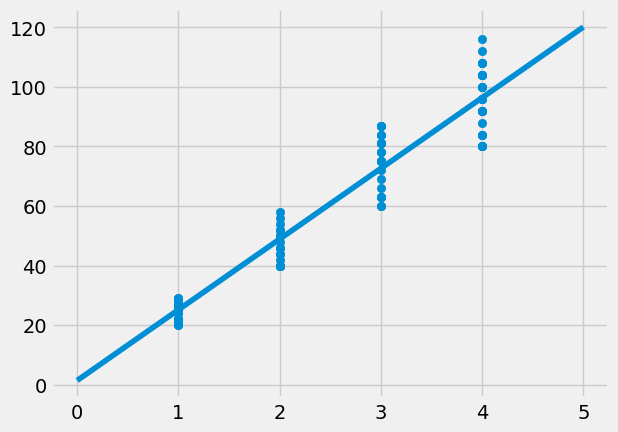

In [29]:
line = np.linspace(0, 5, 1000)

plt.scatter(dataset['kids'], dataset['pocket_money'])
plt.plot(line, mlr.predict(line[:, None]))

In [36]:
# w and b
print(mlr.weights[0], mlr.bias)

23.74489610004045 1.3903474010875445
